In [11]:
import pandas as pd
from transformers import pipeline

In [2]:
maindf = pd.read_csv("../data/Chevron2021.csv")
#maindf = maindf.iloc[: , 1:]
print(maindf.shape)
print(maindf.columns)

(1825, 4)
Index(['Date', 'Tweet ID', 'Text', 'Username'], dtype='object')


In [3]:
sentiment_classifier = pipeline('sentiment-analysis')

maindf = (maindf.assign(sentiment = lambda x: x['Text'].apply(lambda s: sentiment_classifier(s)))
.assign(
label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))))
maindf.head()

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
2022-11-15 01:23:35.876145: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForS

,Date,Tweet ID,Text,Username,sentiment,label,score
0,2021-04-01 23:30:55+00:00,1377765449077829646,@ltgrusselhonore @Baton @bp @exxonmobil @Chevr...,Fess1970,"[{'label': 'NEGATIVE', 'score': 0.961742639541...",NEGATIVE,0.961743
1,2021-04-01 23:18:56+00:00,1377762433461231617,if we lived in a just and honorable world ever...,buhbuhballin,"[{'label': 'NEGATIVE', 'score': 0.945913970470...",NEGATIVE,0.945914
2,2021-04-01 22:40:02+00:00,1377752643876098053,Committing to zero routine flaring by 2025 wil...,EDFEnergyEX,"[{'label': 'NEGATIVE', 'score': 0.999148964881...",NEGATIVE,0.999149
3,2021-04-01 22:12:22+00:00,1377745681134198789,Does Chevron spend 98% of its worth on dirty o...,jenkrill,"[{'label': 'NEGATIVE', 'score': 0.995059728622...",NEGATIVE,0.995060
4,2021-04-01 22:00:21+00:00,1377742656160284677,@SDonziger @DavidYankovich Is Chevron the Russ...,Jackie1Connolly,"[{'label': 'NEGATIVE', 'score': 0.996746778488...",NEGATIVE,0.996747


In [4]:
#Save for later
maindf.to_csv("../data/sentiment_scored_chevron.csv",encoding='utf-8', index=False)

In [7]:
maindf['label'].describe()

count         1825
unique           2
top       NEGATIVE
freq          1496
Name: label, dtype: object

In [12]:
###Loading the files(Picking up where left off)
maindf = pd.read_csv("../data/sentiment_scored_chevron.csv")
stock_df = pd.read_csv("../data/ChevronStock2021.csv")

###Changing the formatting of the Date for main_df
maindf["Date"] = maindf["Date"].map(lambda x : x[0:10])
merged_df = pd.merge(maindf, stock_df, on = "Date")

In [13]:
merged_df.head()

,Date,Tweet ID,Text,Username,sentiment,label,score,Open,High,Low,Close,Adj Close,Volume
0,2021-04-01,1377765449077829646,@ltgrusselhonore @Baton @bp @exxonmobil @Chevr...,Fess1970,"[{'label': 'NEGATIVE', 'score': 0.961742639541...",NEGATIVE,0.961743,105.260002,105.860001,104.209999,105.75,99.121391,8515800
1,2021-04-01,1377762433461231617,if we lived in a just and honorable world ever...,buhbuhballin,"[{'label': 'NEGATIVE', 'score': 0.945913970470...",NEGATIVE,0.945914,105.260002,105.860001,104.209999,105.75,99.121391,8515800
2,2021-04-01,1377752643876098053,Committing to zero routine flaring by 2025 wil...,EDFEnergyEX,"[{'label': 'NEGATIVE', 'score': 0.999148964881...",NEGATIVE,0.999149,105.260002,105.860001,104.209999,105.75,99.121391,8515800
3,2021-04-01,1377745681134198789,Does Chevron spend 98% of its worth on dirty o...,jenkrill,"[{'label': 'NEGATIVE', 'score': 0.995059728622...",NEGATIVE,0.995060,105.260002,105.860001,104.209999,105.75,99.121391,8515800
4,2021-04-01,1377742656160284677,@SDonziger @DavidYankovich Is Chevron the Russ...,Jackie1Connolly,"[{'label': 'NEGATIVE', 'score': 0.996746778488...",NEGATIVE,0.996747,105.260002,105.860001,104.209999,105.75,99.121391,8515800


In [14]:
merged_df.isna().sum()

Date         0
Tweet ID     0
Text         0
Username     0
sentiment    0
label        0
score        0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

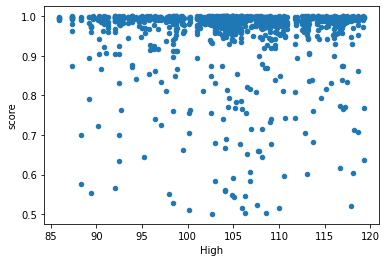

In [16]:
merged_df.plot.scatter(x = 'High', y = 'score')
merged_df.to_csv("../data/merged.csv",encoding='utf-8', index=False)